In [35]:
pip install "numpy<2" --force-reinstall


  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten , Dense
import numpy as np
import matplotlib.pyplot as plt
import random


In [6]:
x_train = np.loadtxt('input.csv',delimiter = ',')
y_train = np.loadtxt('labels.csv', delimiter = ',')
x_test = np.loadtxt('input_test.csv',delimiter = ',')
y_test = np.loadtxt('labels_test.csv' ,delimiter = ',')

In [7]:
x_train = x_train.reshape(len(x_train), 100 ,100,3)
y_train = y_train.reshape(len(y_train), 1)
x_test = x_test.reshape(len(x_test), 100 ,100,3)
y_test = y_test.reshape(len(y_test), 1)

x_train = x_train/255.0
x_test = x_test/255.0


In [8]:
print("shape of x_train",x_train.shape)
print("shape of y train",y_train.shape)
print("shape of x test",x_test.shape)
print("shape of y test",y_test.shape)

shape of x_train (2000, 100, 100, 3)
shape of y train (2000, 1)
shape of x test (400, 100, 100, 3)
shape of y test (400, 1)


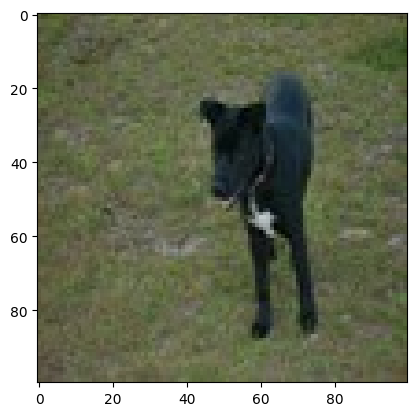

In [10]:
idx = random.randint(0,len(x_train))
plt.imshow(x_train[idx,:])
plt.show()

In [15]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [18]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape =(100,100,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [22]:
model.fit(x_train,y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 182ms/step - accuracy: 0.4930 - loss: 0.7289
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - accuracy: 0.5805 - loss: 0.6923
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 163ms/step - accuracy: 0.5925 - loss: 0.6775
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - accuracy: 0.6310 - loss: 0.6399
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step - accuracy: 0.7170 - loss: 0.5654


In [20]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 47, 47, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 16928)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       1,083,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,093,665 (4.17 MB)

 Trainable params: 1,093,665 (4.17 MB)

 Non-trainable params: 0 (0.00 B)

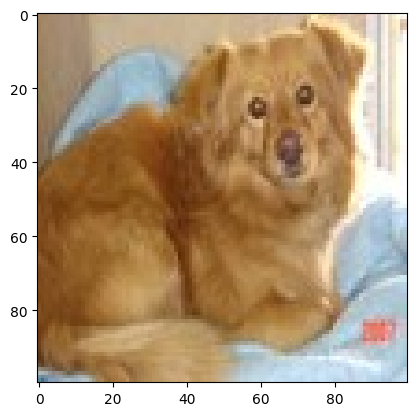

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
[[0.4462241]]
our model says dog


In [25]:
idx2 = random.randint(0,len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()
y_pred = model.predict(x_test[idx2, :].reshape(1,100,100,3))
print(y_pred)
y_pred = y_pred >0.5
if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
print('our model says',pred)